## Dataset Preparation (IRIS classification)

In [1]:
# This code using IRIS dataset on Kaggle (https://www.kaggle.com/datasets/uciml/iris)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Preview

In [3]:
dataframe = pd.read_csv("./Iris.csv")
rows, col = dataframe.shape
dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataframe.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
dataframe['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Visualization

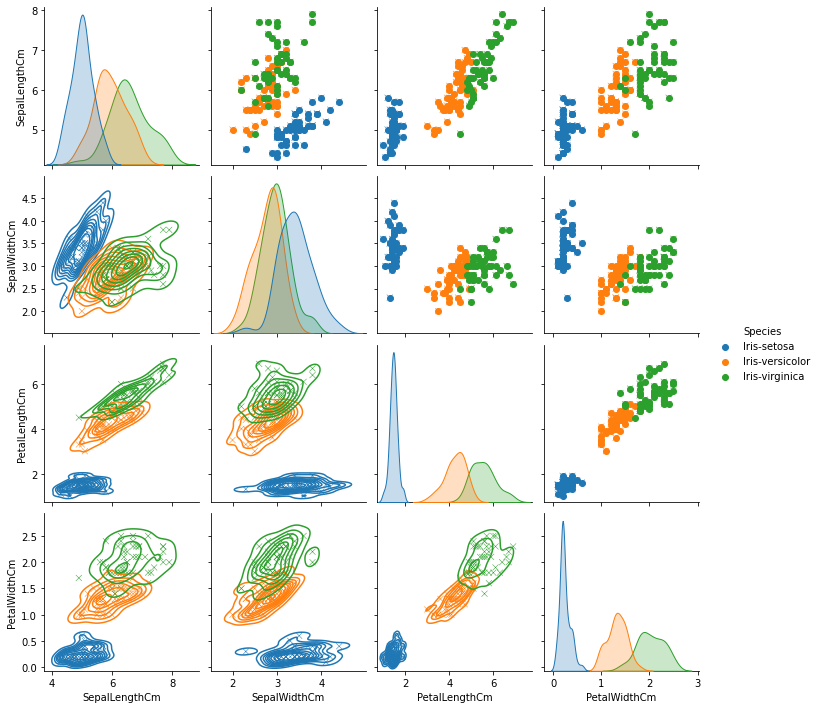

In [6]:
snsdata = dataframe.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

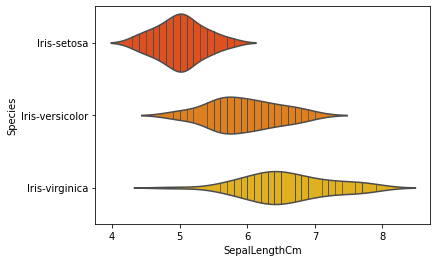

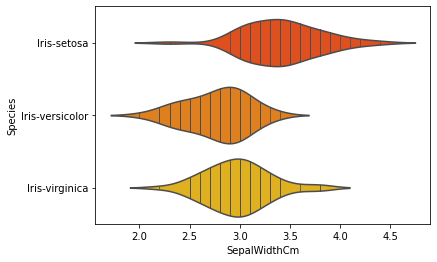

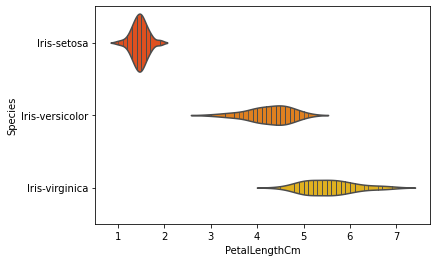

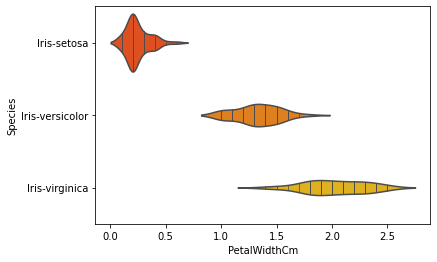

In [7]:
# Violin Plot
sns.violinplot(x='SepalLengthCm', y='Species', data=dataframe, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='SepalWidthCm', y='Species', data=dataframe, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalLengthCm', y='Species', data=dataframe, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalWidthCm', y='Species', data=dataframe, inner='stick', palette='autumn')
plt.show()

## Multivariate Linear Regression for IRIS Classification

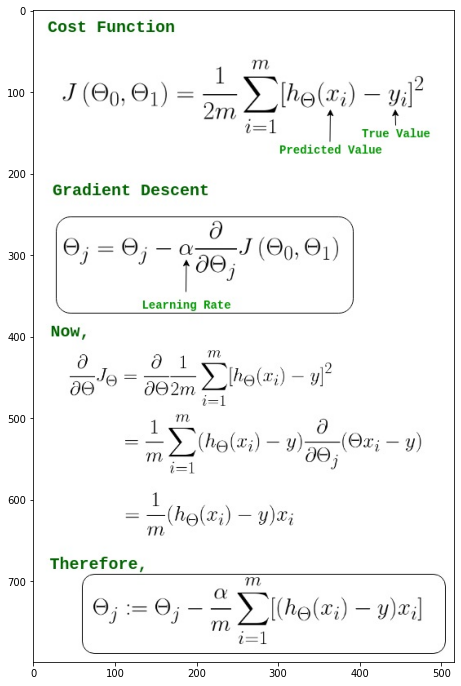

In [16]:
# In this case, i create Multiavariate Linear Regression using Gradient Descent Algorithm
# Formula reference https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/

img = plt.imread('./Cost-Function.jpg')

original_width, original_height = img.shape[1], img.shape[0]

# Set the new figure size (2x original size)
new_width, new_height = original_width * 1.5, original_height * 1.5
plt.figure(figsize=(new_width/100, new_height/100))

plt.imshow(img)

In [8]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

X = dataframe.drop(['Id', 'Species'], axis=1).values # Input Feature Values
y = dataframe.Species.replace(mapping).values.reshape(rows,1) # Output values

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias

In [9]:
np.random.seed(0) # Let's set the zero for time being
theta = np.random.randn(1,5) # Setting values of theta randomly

print("Theta : %s" % (theta))

Theta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


In [10]:
iteration = 10000
learning_rate = 0.005 # alpha
J = np.zeros(iteration) # 1 x 10000 maxtix

#### Gradient Descent Algorithm

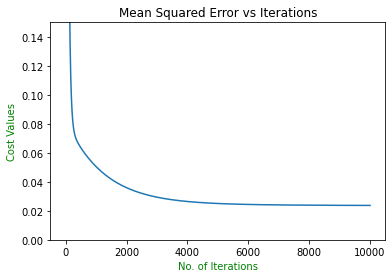

In [12]:
# Loss Function using MSE
for i in range(iteration):
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))

prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()

## Result Summary

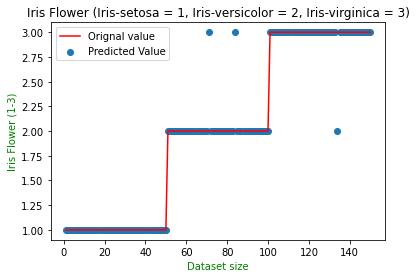

In [13]:
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Orignal value', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Predicted Value')

plt.xlabel("Dataset size", color="Green")
plt.ylabel("Iris Flower (1-3)", color="Green")
plt.title("Iris Flower (Iris-setosa = 1, Iris-versicolor = 2, Iris-virginica = 3)")

ax.legend()
plt.show()

In [14]:
# Get Accuracy
accuracy = (sum(prediction == y)/float(len(y)) * 100)[0]
print("The model predicted values with an overall accuracy of %s" % (accuracy))

The model predicted values with an overall accuracy of 98.0
